# DRAFT VERSION. 

### It is based on my local folders. I will refactor whole code asap. :)

I am trying to reproduce [pyannote.audio](https://github.com/pyannote/pyannote-audio) tutorials.

In [ ]:
# Clone the repository to access .yml files.

!git clone https://github.com/pyannote/pyannote-audio.git

In [ ]:
import numpy as np

In [ ]:
!python --version

In [ ]:
from pyannote.database import *

In [ ]:
# Read the config.yml file to reproduce exact result. 

# !cat ./pyannote-audio/tutorials/change-detection/config.yml

In this notebook, I will use AMI Corpus.

In [ ]:
# To get shell script to download AMI Corpus. Also, you can create new script from
# http://groups.inf.ed.ac.uk/ami/download/ Please select all meetings and headset
# mix for this example.


!wget http://groups.inf.ed.ac.uk/ami/download/temp/amiBuild-9938-Thu-Jul-19-2018.wget.sh

In [ ]:
# Give permission to AMI Corpus script

!chmod +x amiBuild-9938-Thu-Jul-19-2018.wget.sh

In [ ]:
# Run the shell script to download datas.

! ./amiBuild-9938-Thu-Jul-19-2018.wget.sh

In [ ]:
# Create new folder to create db.yml inside of that folder.

!mkdir .pyannote

In [ ]:
! cat ./.pyannote/db.yml | grep AMI


I am trying to create db.yml via cat command, however, with Google Colab, I can not do that. So that, I just download this file from my Google Drive. To create, you own db.yml, you can use any text editor. We should write the directory of AMI Corpus. In this case, it is  **AMI: ../pyannote-audio/amicorpus/*/audio/{uri}.wav**


In [ ]:
!cat ./.pyannote/db.yml | grep AMI 

In [ ]:
!ls

In [ ]:
cd pyannote-audio

Now, time for the tutorials. In this notebook, I will provide codes for training and validation. For further information, please check the [repository.](github.com/pyannote/pyannote-audio/tree/master/tutorials)

## **Feature Extraction**

In [ ]:
# !cat tutorials/feature-extraction/config.yml

In [ ]:
!pyannote-speech-feature tutorials/feature-extraction AMI.SpeakerDiarization.MixHeadset

In [ ]:
!ls tutorials/feature-extraction/AMI | head -n 5

In [ ]:
import numpy as np
en2001a_mfcc_arr = np.load("tutorials/feature-extraction/AMI/EN2001a.Mix-Headset.npy")

In [ ]:
print (en2001a_mfcc_arr)
print (en2001a_mfcc_arr.shape)
print (en2001a_mfcc_arr.max())
print (en2001a_mfcc_arr.mean())
print (en2001a_mfcc_arr.min())
# en2201a -> 5223 seconds

In [ ]:
import matplotlib.pyplot as pp
%matplotlib inline

pp.plot(en2001a_mfcc_arr[245:255,:19])
pp.axhline(y=0.5, color='r', linestyle='-')
pp.show()

In [ ]:
pp.plot(en2001a_mfcc_arr[25000:25090,19:38])
pp.axhline(y=0.5, color='r', linestyle='-')
pp.show()

In [ ]:
pp.plot(en2001a_mfcc_arr[25000:25050,38:57])
pp.axhline(y=0.5, color='r', linestyle='-')
pp.show()

In [ ]:
pp.plot(en2001a_mfcc_arr[30000:30036,57:])
pp.axhline(y=0.5, color='r', linestyle='-')
pp.show()

In [ ]:
en2001a_mfcc_arr_sw = np.swapaxes(en2001a_mfcc_arr,0,1)

for single_arr in en2001a_mfcc_arr_sw:
    print ("Max:", single_arr.max())
    print ("Mean:", single_arr.mean())
    print ("Min:", single_arr.min())

In [ ]:
en2001a_mfcc_arr.max()

In [ ]:
tanh_en2001_mfcc_arr = np.tanh(en2001a_mfcc_arr)

In [ ]:
tanh_en2001_mfcc_arr_sw = np.swapaxes(tanh_en2001_mfcc_arr,0,1)

for single_arr in tanh_en2001_mfcc_arr_sw:
    print ("Max:", single_arr.max())
    print ("Mean:", single_arr.mean())
    print ("Min:", single_arr.min())

In [ ]:
tanh_en2001_mfcc_arr.min()

In the paper, they use 13 coefficients for mfcc and mfcc´s derivatives. However, in code, they use 19 coefficients for these features.

## *Speech activity detection*

In [ ]:
cat tutorials/speech-activity-detection/config.yml

If you want to use tensorboard, you can check [this](https://stackoverflow.com/questions/47818822/can-i-use-tensorboard-with-google-colab)

In [ ]:
# Training.

!pyannote-speech-detection train --to=5 tutorials/speech-activity-detection AMI.SpeakerDiarization.MixHeadset

In [ ]:
# Validation.

!pyannote-speech-detection validate tutorials/speech-activity-detection/train/AMI.SpeakerDiarization.MixHeadset.train AMI.SpeakerDiarization.MixHeadset

## *Speaker Change Detection*

In [ ]:
# cat tutorials/change-detection/config.yml

In [ ]:
# !pyannote-speech-detection -h 

In [ ]:
# Training.

!pyannote-change-detection train --to=250  tutorials/change-detection AMI.SpeakerDiarization.MixHeadset 

In [ ]:
# Validation
!pyannote-change-detection validate --purity=0.8 --to=5 tutorials/change-detection/train/AMI.SpeakerDiarization.MixHeadset.train AMI.SpeakerDiarization.MixHeadset

In [ ]:
cd ..

In [ ]:
# !ls

In [ ]:
mkdir raw_scores

In [ ]:
cd pyannote-audio/

In [ ]:
!pyannote-change-detection apply tutorials/change-detection/train/AMI.SpeakerDiarization.MixHeadset.train/weights/0055.pt   AMI.SpeakerDiarization.MixHeadset raw_scores

In [ ]:
#AMI Protocol
from pyannote.database import get_protocol
protocol = get_protocol('AMI.SpeakerDiarization.MixHeadset')

In [ ]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")

In [ ]:
# Precomputed Scores
from pyannote.audio.features import Precomputed
precomputed = Precomputed('raw_scores')

In [ ]:
precomputed

In [ ]:
precomputed.shape

In [ ]:
en2001a_out = np.load("./raw_scores/AMI/EN2001a.Mix-Headset.npy")

In [ ]:
en2001a_out.shape
# Why it is 2 dimensional?

In [ ]:
print (en2001a_out)
print (en2001a_out.max())
print (en2001a_out.mean())

In [ ]:
import matplotlib.pyplot as pp
%matplotlib inline

pp.plot(en2001a_out)
# pp.axhline(y=0.21, color='r', linestyle='-')
pp.show()

In [ ]:
print(en2001a_out[:,1])
print(en2001a_out[:,1].max())
print(en2001a_out[:,1].mean())

In [ ]:
# how many 0 at  the end of en2001a_out[:,1]
how_many_zero = 0
for num in en2001a_out[:,1]:
    if (num==0):
        how_many_zero += 1
print (how_many_zero)

In [ ]:
output = .5 * (en2001a_out[:, 0] + en2001a_out[:, 1])

In [ ]:
print (output)
print (output.max())
print (output.mean())

In [ ]:
en2001a_out_exp = np.exp(en2001a_out)

In [ ]:
print ()
print (en2001a_out_exp.max())
print (en2001a_out_exp.mean())

In [ ]:
import matplotlib.pyplot as pp

pp.plot(en2001a_out_exp)
pp.axhline(y=0.25, color='r', linestyle='-')
pp.show()

In [ ]:
print(en2001a_out_exp[:,1])
print(en2001a_out_exp[:,1].max())
print(en2001a_out_exp[:,1].mean())

In [ ]:
# Peak Detection
from pyannote.audio.signal import Peak
peak = Peak(alpha=0.26, min_duration=1.0, log_scale=True)

In [ ]:
# Evaluation Metric
from pyannote.metrics.diarization import DiarizationPurityCoverageFMeasure
from pyannote.metrics.segmentation import SegmentationPurity
from pyannote.metrics.segmentation import SegmentationCoverage

metric = DiarizationPurityCoverageFMeasure()
seg_purity = SegmentationPrecision()
seg_coverage = SegmentationCoverage()

In [142]:
# Loop on Test Files
from pyannote.database import get_annotated
for test_file in protocol.test():
    # print (test_file)
    # load reference annotation
    reference = test_file['annotation']
    uem = get_annotated(test_file)

    # load precomputed change scores as pyannote.core.SlidingWindowFeature
    scd_scores = precomputed(test_file)

    # binarize scores to obtain speech regions as pyannote.core.Timeline
    hypothesis = peak.apply(scd_scores, dimension=1)

    # evaluate speech activity detection
    metric(reference, hypothesis.to_annotation(), uem=uem)
    purity, coverage, fmeasure = metric.compute_metrics()
    print(f'Purity = {100*purity:.1f}% / Coverage = {100*coverage:.1f}%')
    print ("Seg Purity: %", 100*seg_purity(reference, hypothesis), "/ Seg Coverage: %", 100*seg_coverage(reference, hypothesis))
    break

Purity = 50.9% / Coverage = 43.2%
Seg Purity: % 0.0 / Seg Coverage: % 62.069256448973434


In [143]:
print (test_file["uri"]) 

EN2002b.Mix-Headset


Purity = 51.0% / Coverage = 42.9%


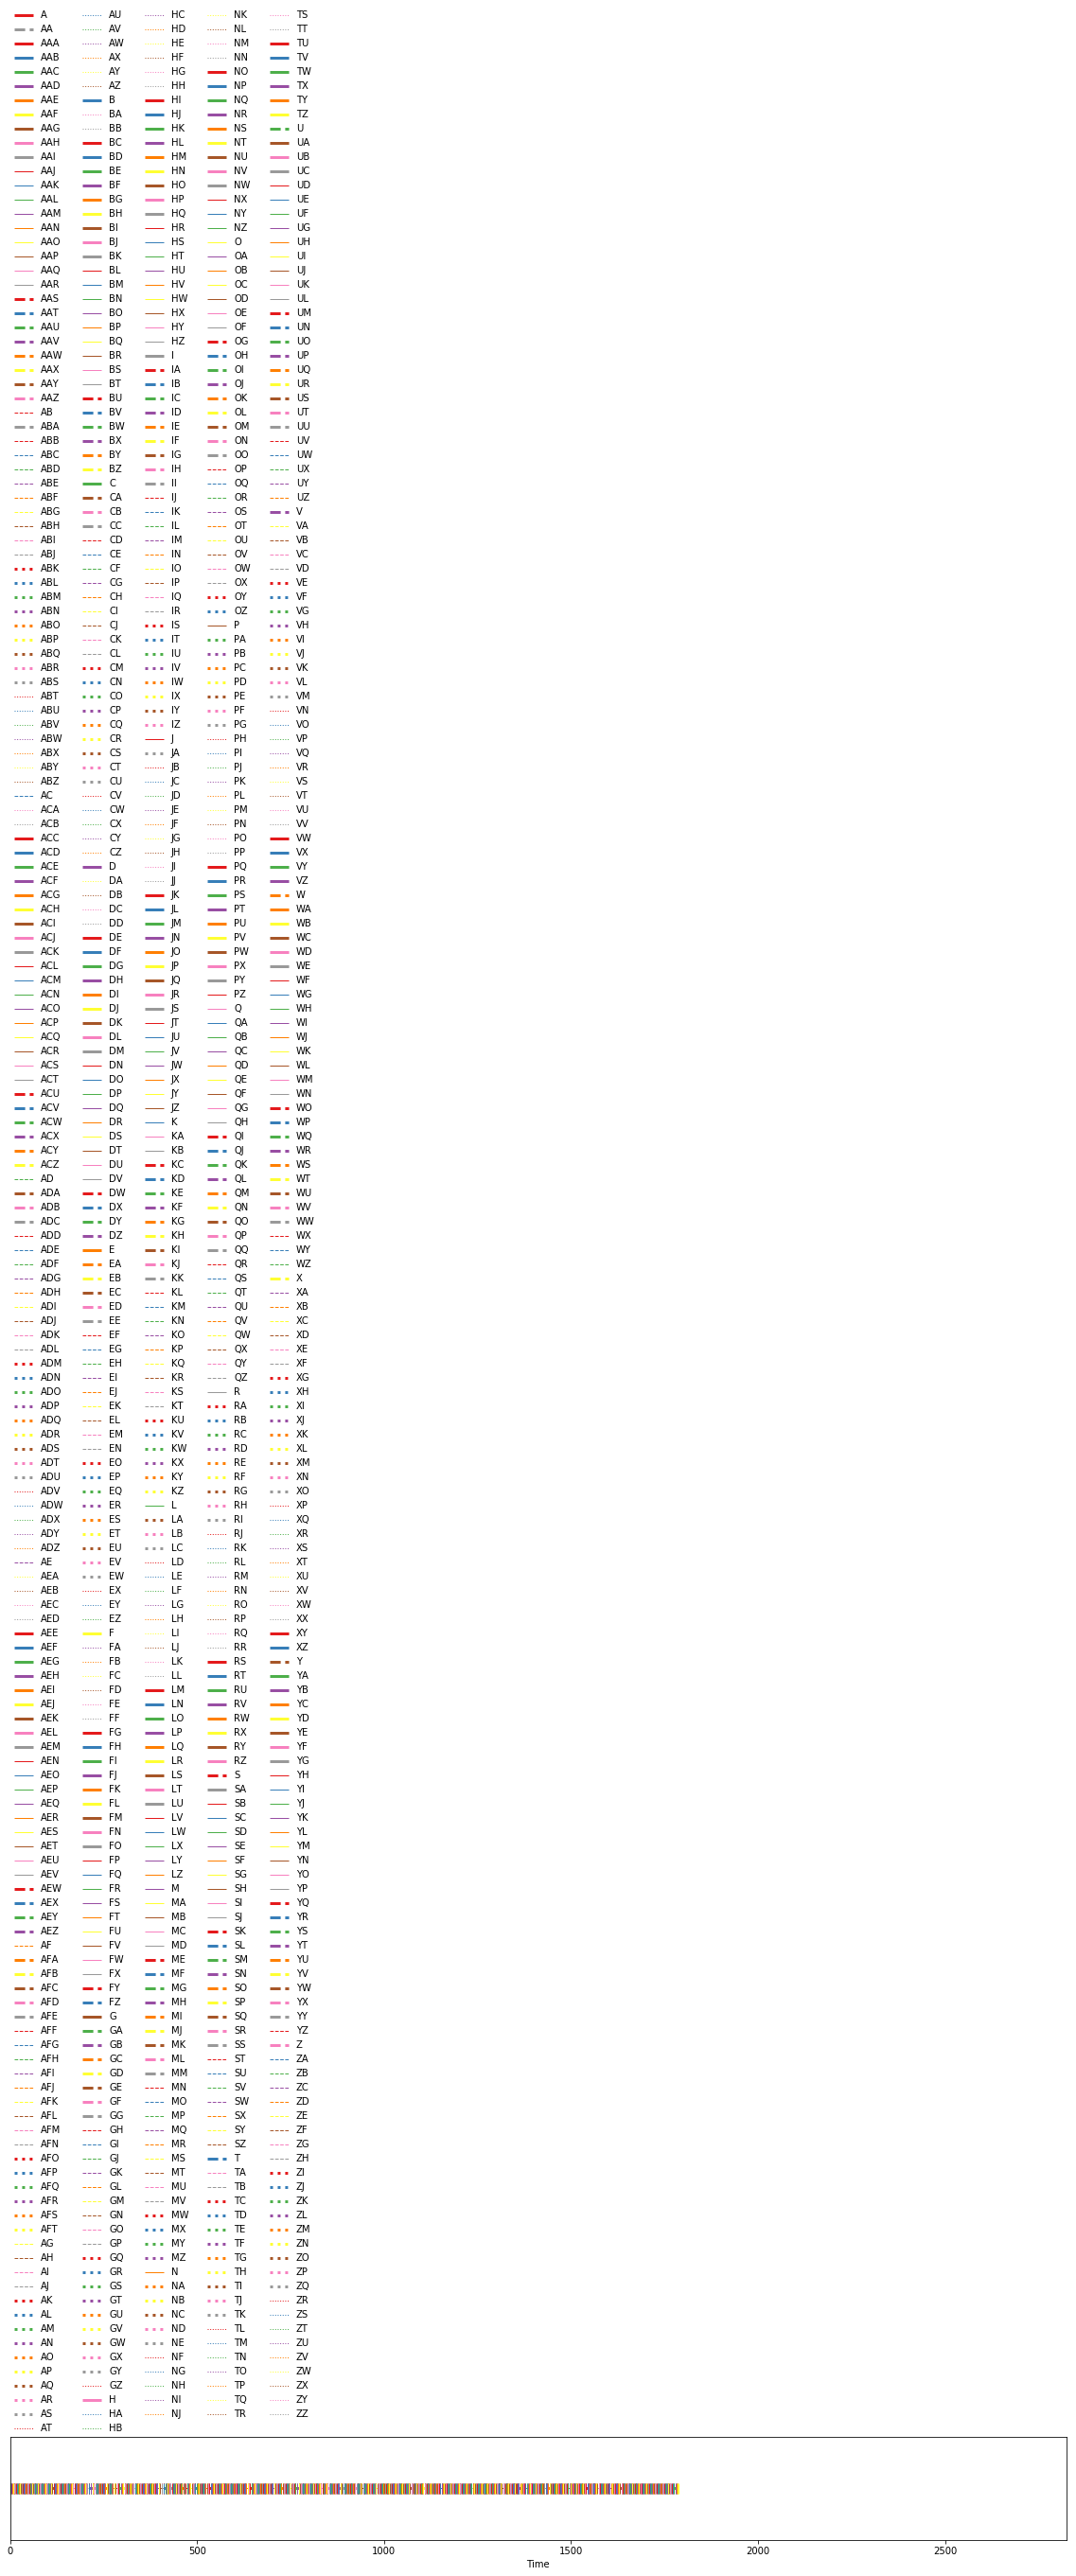

In [144]:
peak = Peak(alpha=0.15, min_duration=1.0, log_scale=True)
hypothesis = peak.apply(scd_scores, dimension=1)

metric(reference, hypothesis.to_annotation(), uem=uem)
purity, coverage, fmeasure = metric.compute_metrics()
print(f'Purity = {100*purity:.1f}% / Coverage = {100*coverage:.1f}%')

hypothesis.to_annotation()

Purity = 51.1% / Coverage = 42.7%


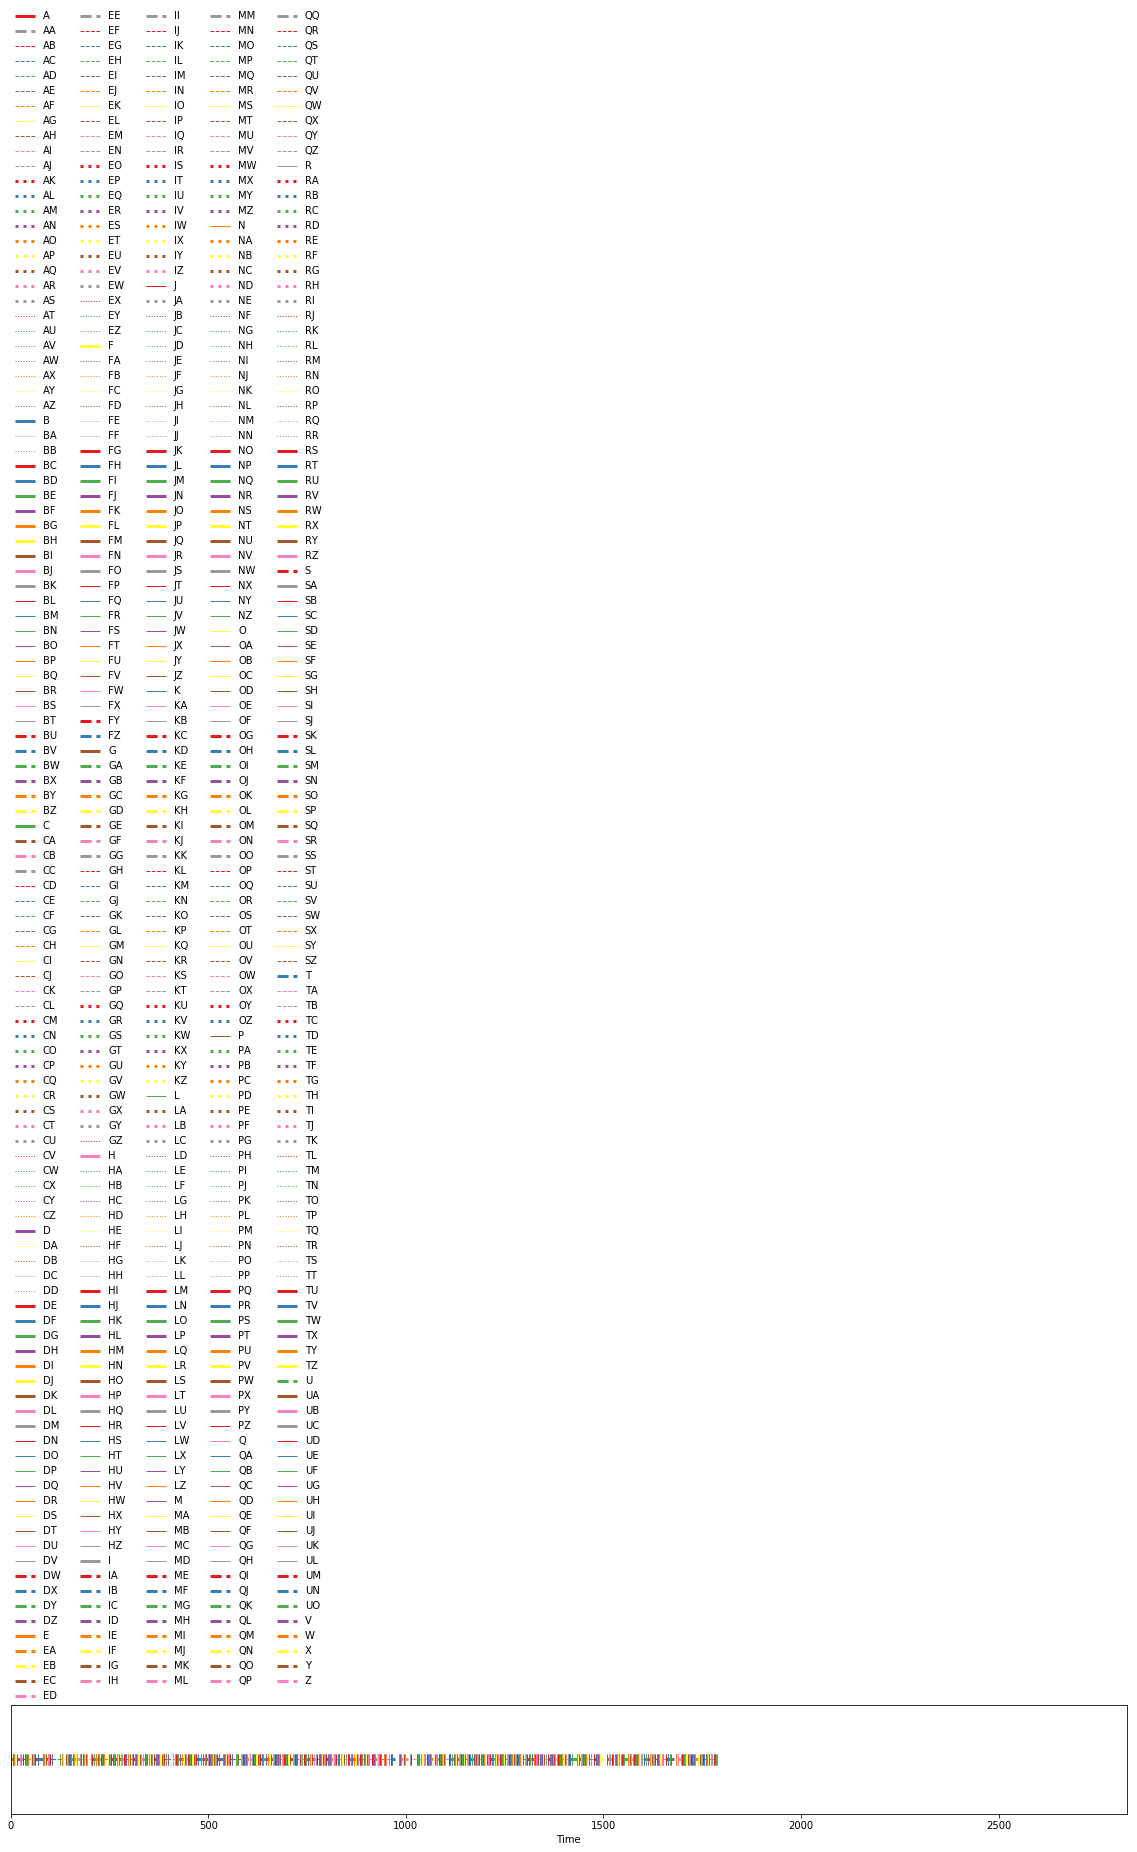

In [145]:
peak = Peak(alpha=0.2, min_duration=1.0, log_scale=True)
hypothesis = peak.apply(scd_scores, dimension=1)

metric(reference, hypothesis.to_annotation(), uem=uem)
purity, coverage, fmeasure = metric.compute_metrics()
print(f'Purity = {100*purity:.1f}% / Coverage = {100*coverage:.1f}%')

hypothesis.to_annotation()

Purity = 51.1% / Coverage = 42.5%


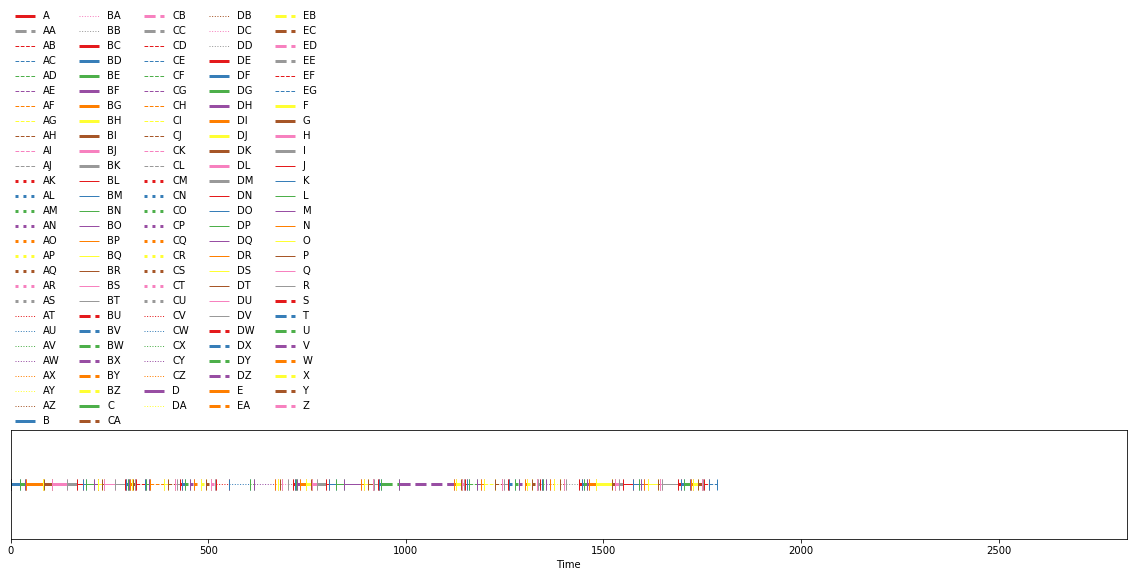

In [146]:
peak = Peak(alpha=0.25, min_duration=1.0, log_scale=True)
hypothesis = peak.apply(scd_scores, dimension=1)

metric(reference, hypothesis.to_annotation(), uem=uem)
purity, coverage, fmeasure = metric.compute_metrics()
print(f'Purity = {100*purity:.1f}% / Coverage = {100*coverage:.1f}%')

hypothesis.to_annotation()

Purity = 51.0% / Coverage = 42.5%


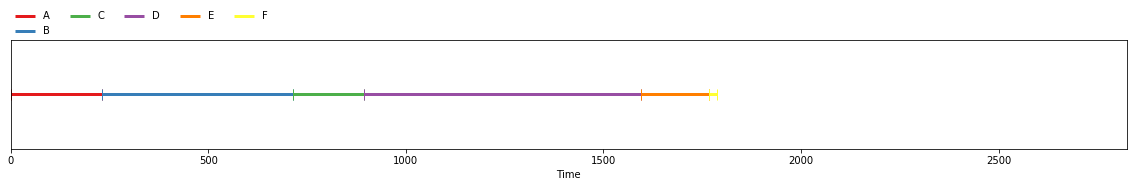

In [147]:
peak = Peak(alpha=0.3, min_duration=1.0, log_scale=True)
hypothesis = peak.apply(scd_scores, dimension=1)

metric(reference, hypothesis.to_annotation(), uem=uem)
purity, coverage, fmeasure = metric.compute_metrics()
print(f'Purity = {100*purity:.1f}% / Coverage = {100*coverage:.1f}%')

hypothesis.to_annotation()

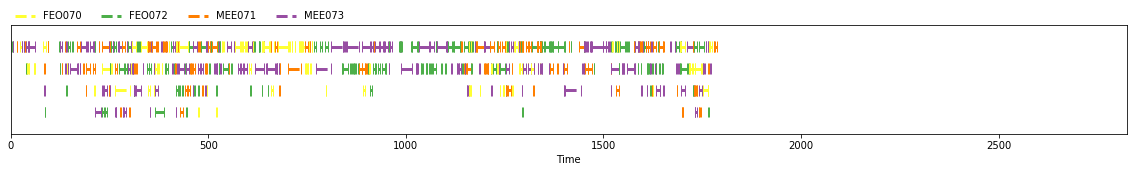

In [148]:
reference

Purity = 51.1% / Coverage = 42.3%


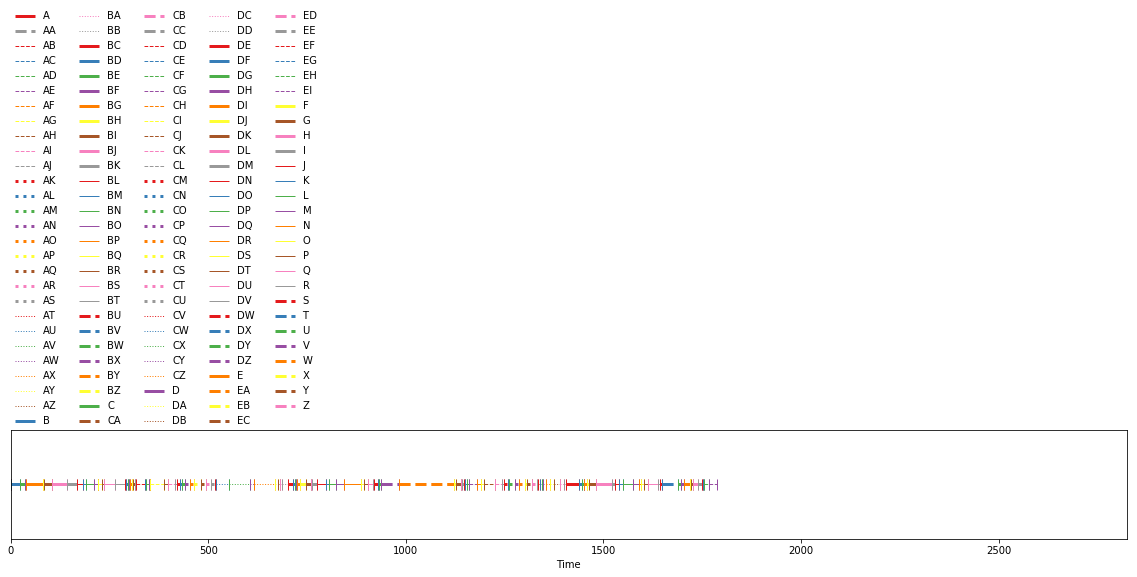

In [149]:
peak = Peak(alpha=0.25, min_duration=0.5, log_scale=True)
hypothesis = peak.apply(scd_scores, dimension=1)

metric(reference, hypothesis.to_annotation(), uem=uem)
purity, coverage, fmeasure = metric.compute_metrics()
print(f'Purity = {100*purity:.1f}% / Coverage = {100*coverage:.1f}%')

hypothesis.to_annotation()

Purity = 51.1% / Coverage = 42.2%


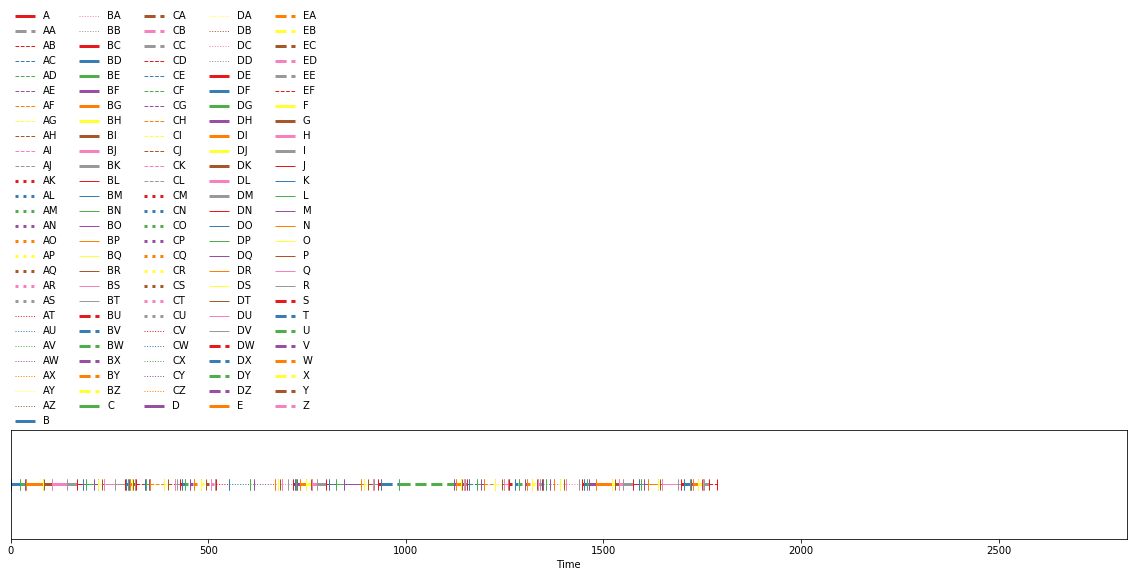

In [150]:
peak = Peak(alpha=0.25, min_duration=1.5, log_scale=True)
hypothesis = peak.apply(scd_scores, dimension=1)

metric(reference, hypothesis.to_annotation(), uem=uem)
purity, coverage, fmeasure = metric.compute_metrics()
print(f'Purity = {100*purity:.1f}% / Coverage = {100*coverage:.1f}%')

hypothesis.to_annotation()

In [ ]:
# Loop on Train Files
from pyannote.database import get_annotated
for train_file in protocol.train():
    # print (test_file)
    # load reference annotation
    reference = train_file['annotation']
    uem = get_annotated(train_file)

    # load precomputed change scores as pyannote.core.SlidingWindowFeature
    scd_scores = precomputed(train_file)

    # binarize scores to obtain speech regions as pyannote.core.Timeline
    hypothesis = peak.apply(scd_scores, dimension=1)

    # evaluate speech activity detection
    metric(reference, hypothesis.to_annotation(), uem=uem)

    purity, coverage, fmeasure = metric.compute_metrics()
    print(f'Purity = {100*purity:.1f}% / Coverage = {100*coverage:.1f}%')
    
    print (train_file["uri"])
    
    break

In [ ]:
peak = Peak(alpha=0.15, min_duration=1.0, log_scale=True)
hypothesis = peak.apply(scd_scores, dimension=1)

metric(reference, hypothesis.to_annotation(), uem=uem)
purity, coverage, fmeasure = metric.compute_metrics()
print(f'Purity = {100*purity:.1f}% / Coverage = {100*coverage:.1f}%')
hypothesis.to_annotation()


In [ ]:
peak = Peak(alpha=0.2, min_duration=1.0, log_scale=True)
hypothesis = peak.apply(scd_scores, dimension=1)

metric(reference, hypothesis.to_annotation(), uem=uem)
purity, coverage, fmeasure = metric.compute_metrics()
print(f'Purity = {100*purity:.1f}% / Coverage = {100*coverage:.1f}%')

hypothesis.to_annotation()



In [ ]:
peak = Peak(alpha=0.25, min_duration=1.0, log_scale=True)
hypothesis = peak.apply(scd_scores, dimension=1)

metric(reference, hypothesis.to_annotation(), uem=uem)
purity, coverage, fmeasure = metric.compute_metrics()
print(f'Purity = {100*purity:.1f}% / Coverage = {100*coverage:.1f}%')

hypothesis.to_annotation()

In [ ]:
peak = Peak(alpha=0.3, min_duration=1.0, log_scale=True)
hypothesis = peak.apply(scd_scores, dimension=1)

metric(reference, hypothesis.to_annotation(), uem=uem)
purity, coverage, fmeasure = metric.compute_metrics()
print(f'Purity = {100*purity:.1f}% / Coverage = {100*coverage:.1f}%')

hypothesis.to_annotation()

In [ ]:
reference

In [ ]:
# Peak Detection
from pyannote.audio.signal import Peak
peak = Peak(alpha=0.1, min_duration=1.0, log_scale=True)

# Loop on Test Files
from pyannote.database import get_annotated
for test_file in protocol.train():
    # print (test_file)
    # load reference annotation
    reference = test_file['annotation']
    uem = get_annotated(test_file)

    # load precomputed change scores as pyannote.core.SlidingWindowFeature
    scd_scores = precomputed(test_file)

    # binarize scores to obtain speech regions as pyannote.core.Timeline
    hypothesis = peak.apply(scd_scores, dimension=1)

    # evaluate speech activity detection
    metric(reference, hypothesis.to_annotation(), uem=uem)

    purity, coverage, fmeasure = metric.compute_metrics()
    print(f'Purity = {100*purity:.1f}% / Coverage = {100*coverage:.1f}%')

In [ ]:
hypothesis.to_annotation()